In [40]:
# Data Wrangling
import numpy as np 
import pandas as pd
import pickle

# Visualização de dados 
import seaborn as sns 
import matplotlib.pyplot as plt
from yellowbrick.regressor import residuals_plot, prediction_error

# Pipelines 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Seleção e validação de modelos 
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# Pré-processamento de dados 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Modelos
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#Remover Warnings
import warnings

In [2]:
#Dicionário para métricas
def get_metrics(y_true, y_pred): #valores reais/previstos
    dict_metrics = {
        'R2' : metrics.r2_score(y_true, y_pred),
        'MAE': metrics.mean_absolute_error(y_true, y_pred),
        'MAPE': metrics.mean_absolute_percentage_error(y_true, y_pred),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_true,y_pred))    
    }
    return dict_metrics

# Análise Exploratória

In [3]:
#Load data
df = pd.read_csv('../data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#Infos estatísticas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Infos gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Remover warnings
warnings.filterwarnings("ignore")

Scatterplot

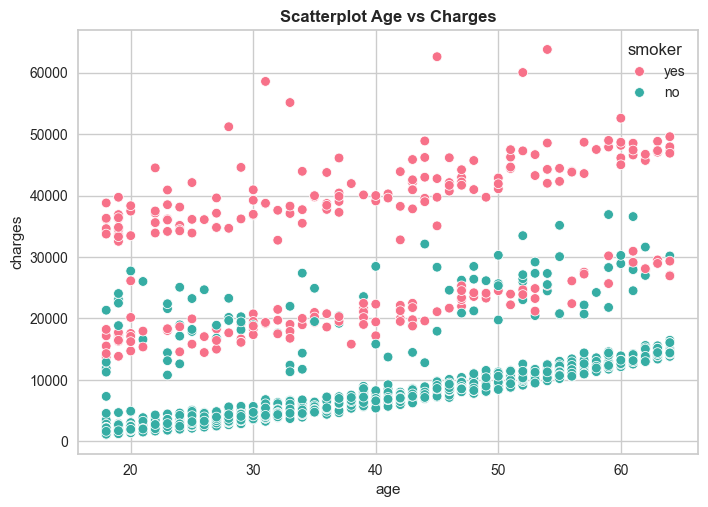

In [7]:
#Dispersão dos dados de Age vs Charges'
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette= 'husl');

#Titulo
plt.title('Scatterplot Age vs Charges', fontweight = 'bold');

**Insights**

- A relação entre idade e custos pode indicar um aumento gradual nos custos com o aumento da idade.
- Para fumantes (smoker), os custos tendem a ser mais altos, independentemente da idade.

Text(0.5, 1.0, 'Scatterplot Bmi vs Charges')

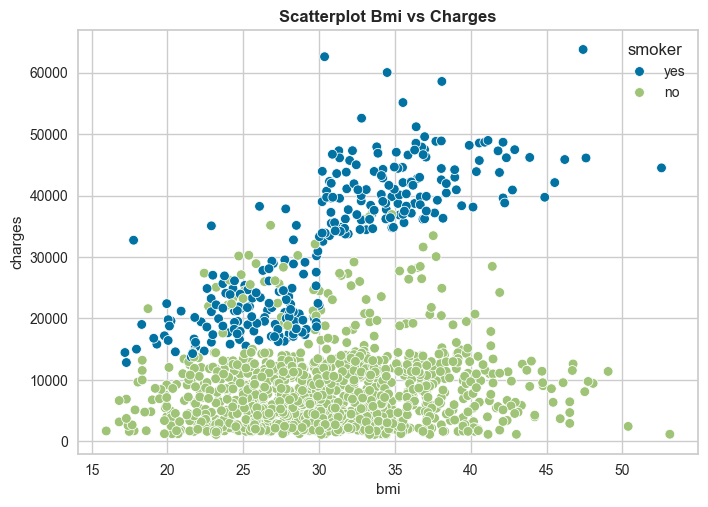

In [8]:
#Dispersão dos dados de Bmi vs Carges
sns.scatterplot(data = df, x= 'bmi', y = 'charges', hue= 'smoker')

#Titulo
plt.title('Scatterplot Bmi vs Charges', fontweight = 'bold')

**Insights**

- Indivíduos com alto IMC podem ter custos médicos mais elevados, especialmente entre fumantes.
- Pode haver uma correlação positiva moderada entre IMC e custos.

Boxplot

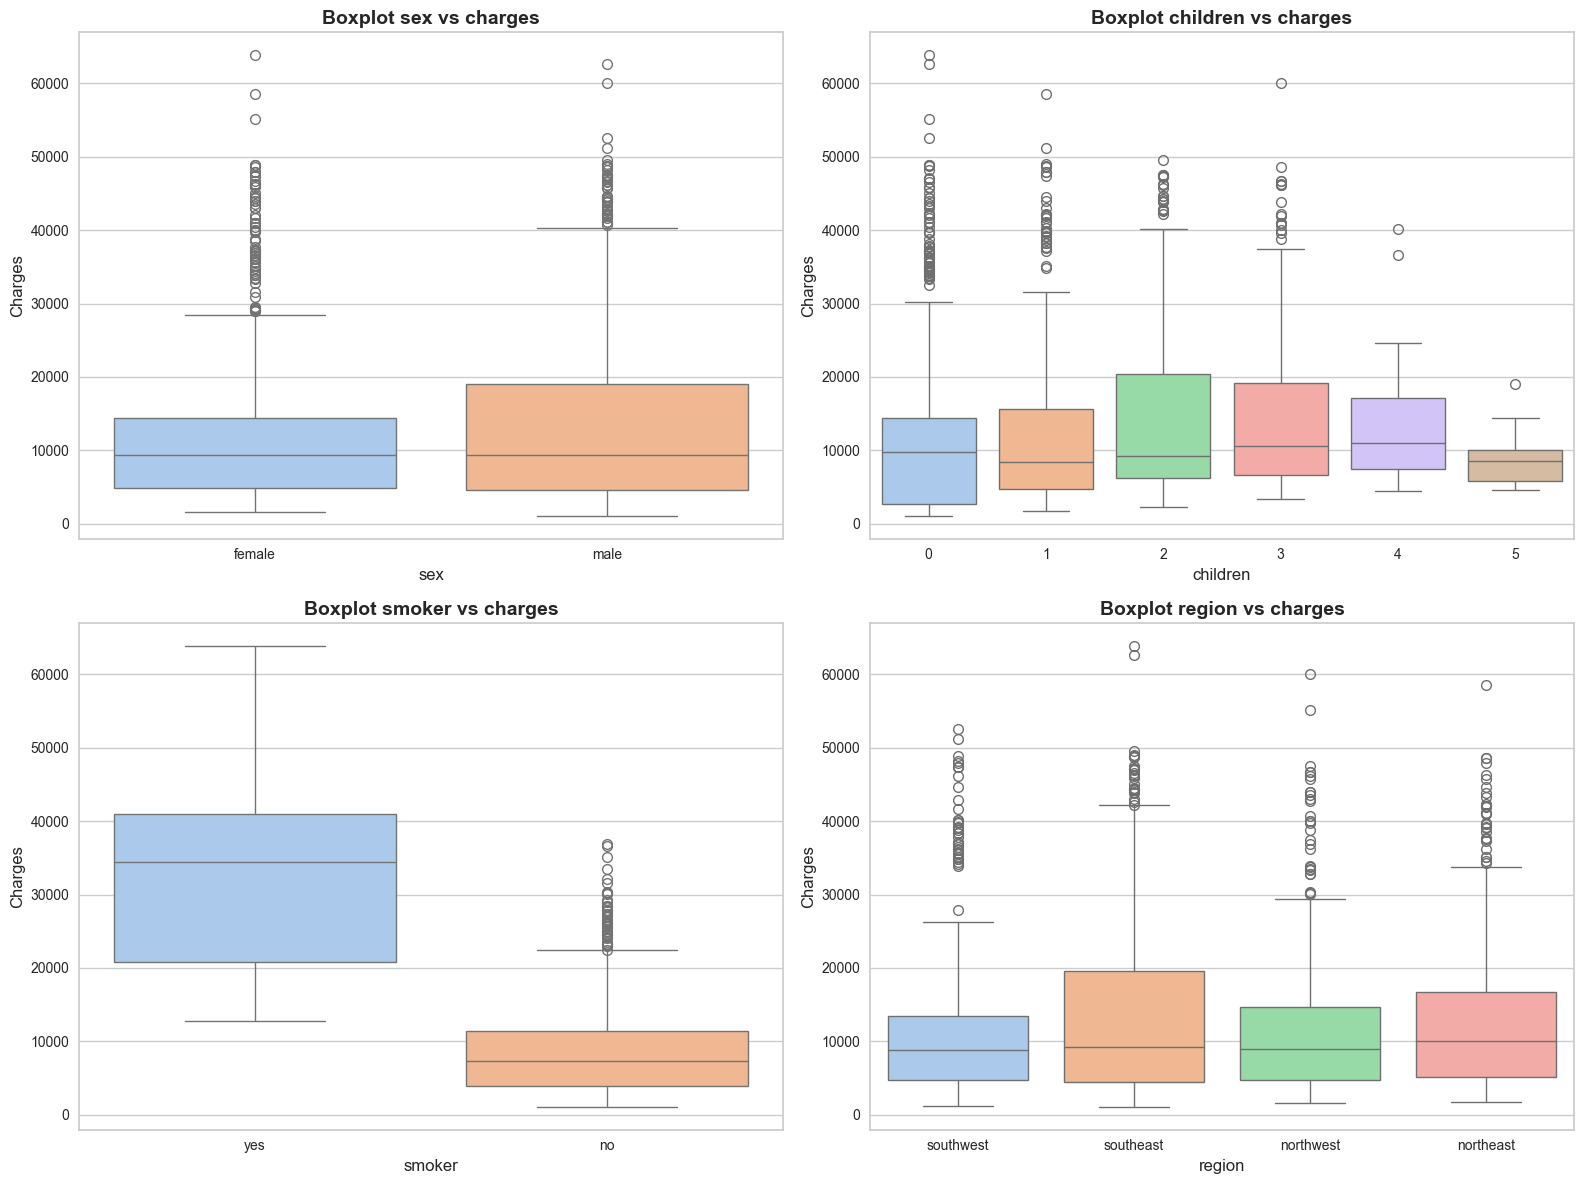

In [9]:
#Lista de coluna categoricas
cat_plot_cols = ['sex','children','smoker','region']

#Subplots
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12)) #duas linhas e duas colunas

#Loop p criar os boxplot
for col, ax in zip(cat_plot_cols, axes.flatten()):
    sns.boxplot(x=col, y='charges', data=df, ax=ax, palette= 'pastel')
    #Titulos e eixos
    ax.set_title(f'Boxplot {col} vs charges', fontsize = 14, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 12)
    ax.set_ylabel('Charges', fontsize = 12)
    
#Layout
plt.tight_layout()
plt.show()


**Insights**

- smoker: Fumantes apresentam custos significativamente mais altos do que não fumantes.
- region: As regiões podem ter distribuições semelhantes de custos, indicando que a localização pode não ser um fator significativo.
- children: O número de filhos parece ter impacto moderado nos custos, possivelmente devido a plano

In [10]:
#Correlação
numeric_cols = df.select_dtypes(include=['number'])

dfc = numeric_cols.corr()
dfc

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Heatmap

<Axes: >

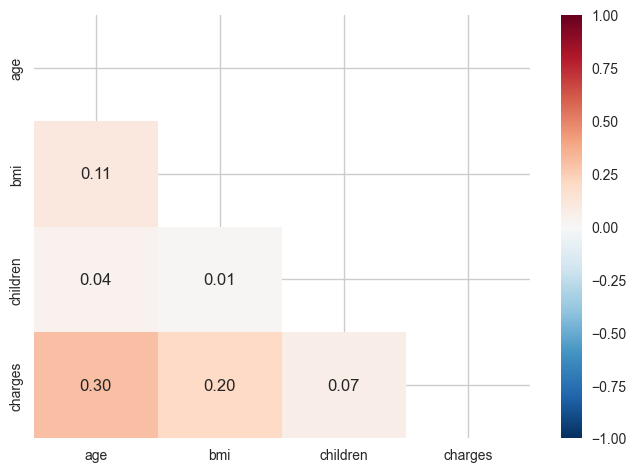

In [11]:
#Mask 
mask = np.zeros(dfc.shape).astype(bool) #matriz de zeros do mesmo tamanho do meu df e convertendo em boolean
mask[np.triu_indices_from(mask)] = True #ocultar a parte superior do heatmapa

#Heatmap
sns.heatmap(dfc, annot = True, fmt= '.2f', center=0, vmax= 1, vmin=-1, cmap = 'RdBu_r', mask = mask ) 

Pairplot

Text(0.5, 1.02, 'Distribuição dos dados')

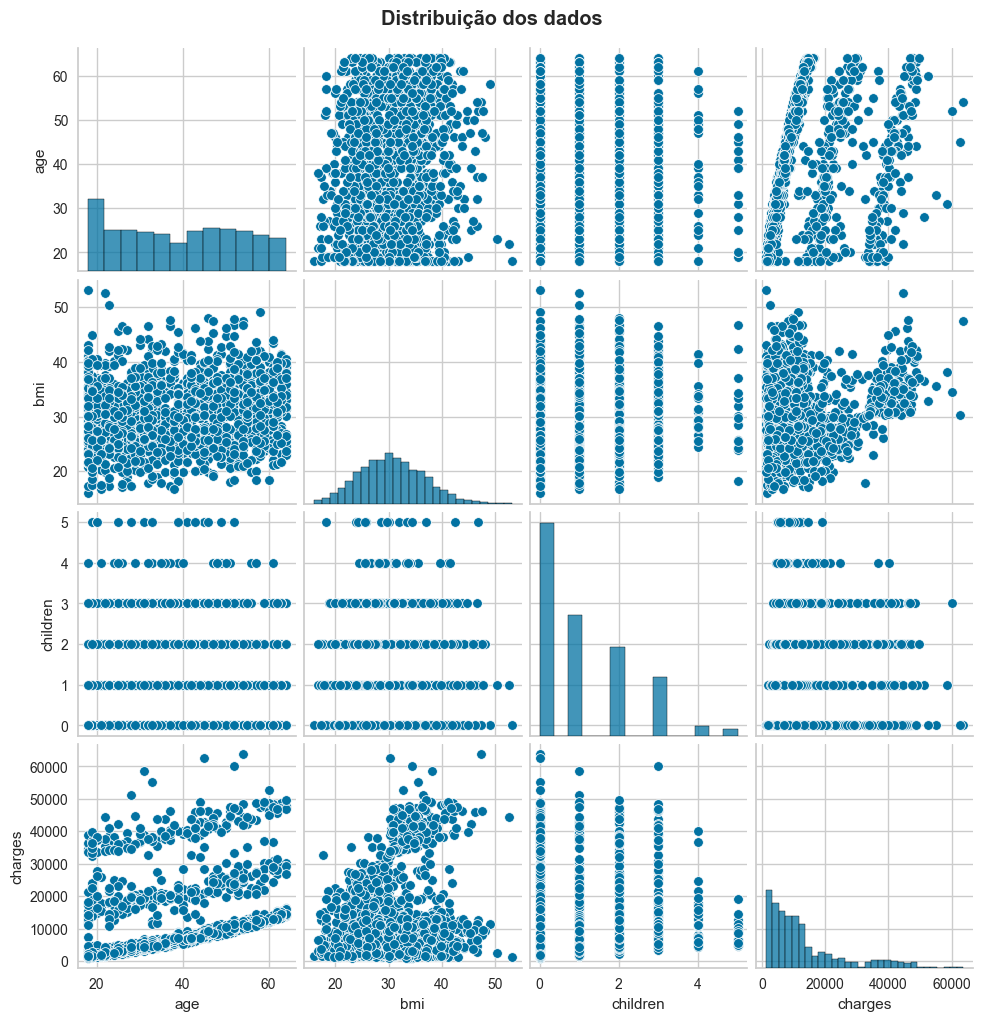

In [12]:
#Verificando distribuição dos dados com Pairplot 
pairplot = sns.pairplot(df)
#Titulos e eixos 
pairplot.fig.suptitle('Distribuição dos dados', fontweight = 'bold', y =1.02)

# Modelling

In [13]:
#Selecionando features 
NUMERICAL_FEATURES = ['age','bmi','children']
CATEGORICAL_FEATURES = ['sex','smoker','region']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

In [14]:
# X e y 
X = df[FEATURES]
y = df[TARGET]

#Treino e test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 2023)

**Pipelines**

In [15]:
#Transformando variáveis numéricas
numerical_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #preenchendo valores null pela média
    ('scaler', MinMaxScaler())       #padronizando dados (0/1)
])

#Transformando variáveis categóricas
categorical_transformer = OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse_output= False) #removendo e ignorando cat desconhecidas e retornando um array densa

#Definindo preprocessor
preprocessor = ColumnTransformer([                          #aplica transformações em colunas p um unico array
    ('num', numerical_tranformer, NUMERICAL_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)      
])

#Transform dos dados
preprocessor.fit_transform(X_train)

array([[0.97826087, 0.15334948, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.7826087 , 0.53416734, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.45652174, 0.19679849, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17391304, 0.65173527, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.30434783, 0.82243745, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.04347826, 0.3669626 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [16]:
#Definindo Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DummyRegressor())  #utilizando modelo simples para exemplo
         
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DummyRegressor())])

Comparando algoritmos

In [17]:
#Definindo os modelos/algoritimos para o Grid Search
params = {
    'model' : [
        DummyRegressor(),
        LinearRegression(),
        LassoCV(), 
        RidgeCV(),
        RandomForestRegressor(random_state= 2023), 
        GradientBoostingRegressor(random_state= 2023)
     ]    
}

#Aplicando Grid Search para encontrar melhores modelos e hiperparametros
grid_model = GridSearchCV(model_pipeline, params, cv= 5, scoring= 'r2', verbose=1) #cross validation com 5 partes e definindo a métrica como r²
grid_model.fit(X_train, y_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Analisando **Residuos** do modelo

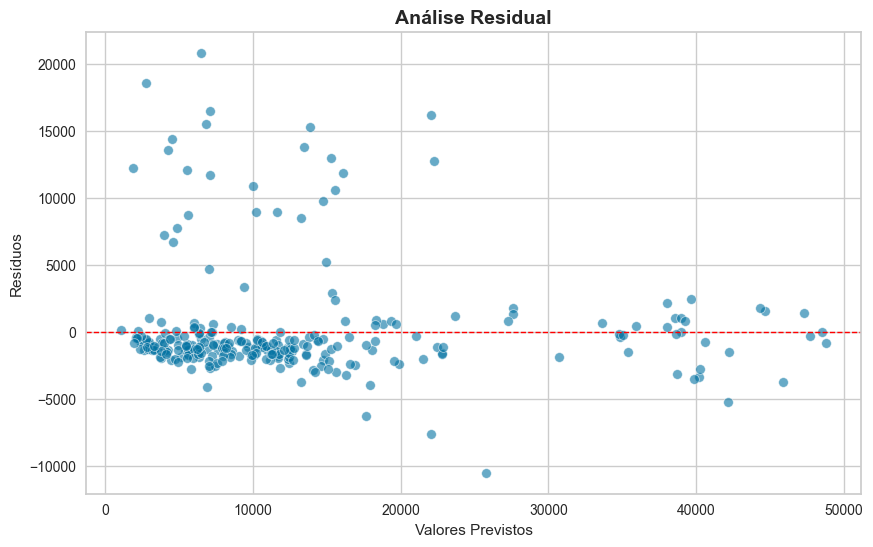

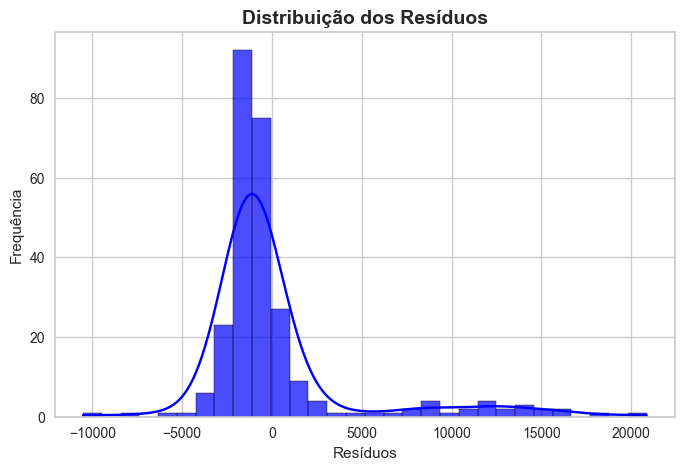

In [18]:
# Prever no conjunto de teste
y_test_pred = grid_model.predict(X_test)

# Calcular resíduos
residuals = y_test - y_test_pred

# Plotar os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  #linha do 0
plt.title('Análise Residual', fontsize=14, fontweight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

# Histogram de resíduos
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribuição dos Resíduos', fontsize=14, fontweight='bold')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()


**Análises dos Resíduos**

- A maioria dos resíduos está concentrada próxima à linha de 0, o que é um bom sinal. Isso indica que o modelo tem um desempenho razoável para uma grande parte dos dados.
- No entanto, há alguns pontos com resíduos altos (positivos e negativos), especialmente para valores previstos mais altos
- A distribuição dos resíduos é assimétrica positiva, com a maior parte dos resíduos próximos de zero.
- Isso indica que, para a maioria das observações, os erros são pequenos, o que é um bom sinal de que o modelo está ajustado razoavelmente bem.

In [19]:
#Melhor algoritmo
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', GradientBoostingRegressor(random_state=2023))])

In [20]:
#Organizando resultados em um Df
df_cv = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index() #indíce como rank de melhores modelos

#Filtrando resultados que não contenham 'split/time' 
df_cv.loc[:,~df_cv.columns.str.contains('split|time')] #'split/time' são pontuações possivelmentes não relevantes para os modelos

,param_model,params,mean_test_score,std_test_score
rank_test_score,,,,
1,GradientBoostingRegressor(random_state=2023),{'model': GradientBoostingRegressor(random_sta...,0.849721,0.006758
2,RandomForestRegressor(random_state=2023),{'model': RandomForestRegressor(random_state=2...,0.840805,0.006099
3,LassoCV(),{'model': LassoCV()},0.743770,0.016151
4,RidgeCV(),{'model': RidgeCV()},0.743745,0.016170
5,LinearRegression(),{'model': LinearRegression()},0.743538,0.016222
6,DummyRegressor(),{'model': DummyRegressor()},-0.001045,0.001007


**Análise**
- O **GradientBoostingRegressor** foi o modelo mais eficaz em capturar a relação entre as variáveis preditoras e a variável-alvo.
- O bom equilíbrio entre desempenho (alto R²) e consistência (baixo desvio padrão) indica que este modelo é robusto e generaliza bem.

In [21]:
# Avaliar os modelos do GridSearchCV
results = pd.DataFrame(grid_model.cv_results_)

# Métricas para o melhor modelo
y_test_pred = grid_model.predict(X_test)
metrics_dict = get_metrics(y_test, y_test_pred)

# Exibir as métricas
print("Métricas do Melhor Modelo:")
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")



Métricas do Melhor Modelo:
R2: 0.8604
MAE: 2454.7273
MAPE: 0.2567
RMSE: 4287.6243


# Tunning do modelo

In [22]:
#Definindo o Pipeline com o GradientBoosting
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state= 2023))
])

#Definindo os hiperparametros
params = {
    'model__learning_rate' : [0.1, 0.01],
    'model__max_depth' : [3, 4, 5],         #profundidade da arvore
    'model__n_estimators' : [300, 400, 500], #número total de arvores
    'model__subsample' : [1., .8], #proporção usada para treinar, para evitar o overfitting
}

#Treinando o modelo novamente com os parametros melhorados
grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring= 'r2', n_jobs= -1, verbose=1)
grid_model.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2023))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [300, 400, 500],
                         'model__subsample': [1.0, 0.8]},
             scoring='r2', verbose=1)

Resultado do Tunning

In [23]:
#Organizando resultados em um Df
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index() #indíce como rank de melhores modelos

#Filtrando resultados que não contenham 'split/time' 
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')] #'split/time' são pontuações possivelmentes não relevantes para os modelos

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,mean_test_score,std_test_score
rank_test_score,,,,,,,
1,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.858128,0.006150
2,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.857813,0.006408
3,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.857035,0.006536
4,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.856641,0.006493
5,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.856395,0.005296
6,0.01,3,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855619,0.006343
7,0.01,4,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.853973,0.006299
8,0.01,4,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.853653,0.007385
9,0.01,4,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.853506,0.005888


# **Insights**

**Padrões no Dataset**

- Fumantes: Claramente associados a custos mais altos.

- Idade e IMC: Relacionados positivamente aos custos.

- Região: Não parece ser um preditor significativo.

**Desempenho do Modelo**
- Modelos como Gradient Boosting superam os lineares simples devido à capacidade de capturar não linearidades.

- A regularização (Lasso/Ridge) tem impacto limitado devido à natureza dos dados.

**Impactos e Aplicações**

- Previsões de Custos: Identificar perfis de alto risco (fumantes, alto IMC) pode ajudar as seguradoras a ajustar preços.
- Políticas de Saúde: Incentivar estilos de vida mais saudáveis para reduzir custos médicos associados ao IMC elevado e tabagismo.

**Melhor modelo**

In [24]:
#Selecionando o melhor modelo 
model_pipeline = grid_model.best_estimator_

In [25]:
#Predição de R2 e métricas
y_pred = model_pipeline.predict(X_test)
get_metrics(y_test,y_pred)

{'R2': 0.8666376387968089,
 'MAE': np.float64(2497.122249202784),
 'MAPE': np.float64(0.3013239427631112),
 'RMSE': np.float64(4190.521276202634)}

**Avaliando o modelo**


<Axes: xlabel='charges'>

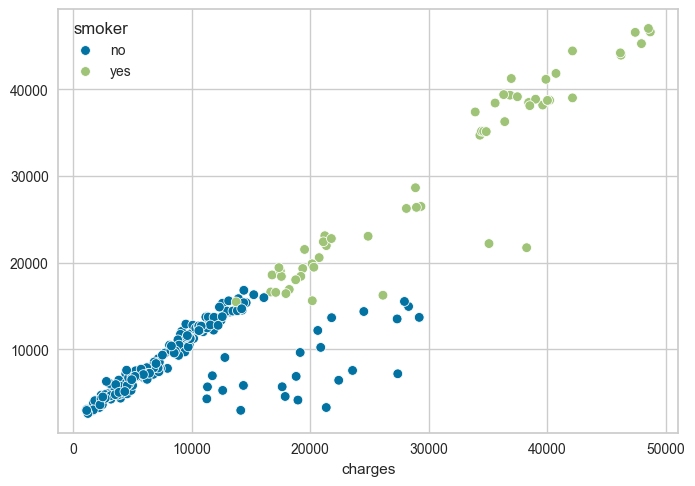

In [26]:
sns.scatterplot(x = y_test, y= y_pred, hue=X_test.smoker)

**Melhores features/variáveis do modelo**

In [28]:
#Verificando importancia das features
model_pipeline.named_steps['model'].feature_importances_


#Obtendo o nome das melhores features
model_pipeline.named_steps['preprocessor'].get_feature_names_out()

array(['num__age', 'num__bmi', 'num__children', 'cat__sex_male',
       'cat__smoker_yes', 'cat__region_northeast',
       'cat__region_northwest', 'cat__region_southeast',
       'cat__region_southwest'], dtype=object)

In [30]:
#Tranformando em um panda Series 
importances = pd.Series(
    model_pipeline.named_steps['model'].feature_importances_,
    model_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

#Plotando as melhores features
importances.sort_values(ascending=False)

cat__smoker_yes          0.691117
num__bmi                 0.179792
num__age                 0.116061
num__children            0.010339
cat__region_northwest    0.001093
cat__region_southwest    0.000746
cat__region_northeast    0.000617
cat__region_southeast    0.000182
cat__sex_male            0.000053
dtype: float64

<Axes: >

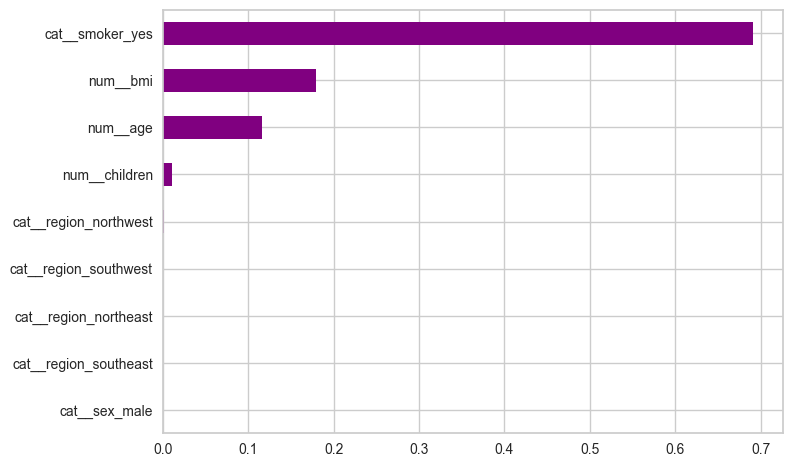

In [33]:
#Amostra visual 
importances.sort_values().plot.barh(color= 'purple')

## **Definindo modelo com melhores features**

In [34]:
#Selecionando features 
NUMERICAL_FEATURES = ['age','bmi','children']
CATEGORICAL_FEATURES = ['smoker']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

X = df[FEATURES]
y = df[TARGET]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 2023)

Aplicando o Pipeline

In [35]:
#Transformando variáveis numéricas
numerical_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #preenchendo valores null pela média
    ('scaler', MinMaxScaler())       #padronizando dados (0/1)
])

#Transformando variáveis categóricas
categorical_transformer = OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse_output= False) #removendo e ignorando cat desconhecidas e retornando um array densa

#Definindo preprocessor
preprocessor = ColumnTransformer([                          #aplica transformações em colunas p um unico array
    ('num', numerical_tranformer, NUMERICAL_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)      
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=2023))

])

#Definindo os hiperparametros
params = {
    'model__learning_rate' : [0.1, 0.01],
    'model__max_depth' : [3, 4, 5],         #profundidade da arvore
    'model__n_estimators' : [300, 400, 500], #número total de arvores
    'model__subsample' : [1., .8], #proporção usada para treinar, para evitar o overfitting
}

#Treinando o modelo novamente com os parametros melhorados
grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring= 'r2', n_jobs= -1, verbose=1)
grid_model.fit(X_train, y_train)


#Transform dos dados
preprocessor.fit_transform(X_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


array([[0.97826087, 0.15334948, 0.2       , 0.        ],
       [0.7826087 , 0.53416734, 0.6       , 0.        ],
       [0.45652174, 0.19679849, 0.6       , 0.        ],
       ...,
       [0.17391304, 0.65173527, 0.        , 0.        ],
       [0.30434783, 0.82243745, 0.4       , 0.        ],
       [0.04347826, 0.3669626 , 0.        , 0.        ]])

In [37]:
#Organizando resultados em um Df
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index() #indíce como rank de melhores modelos

#Filtrando resultados que não contenham 'split/time' 
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')].head() #'split/time' são pontuações possivelmentes não relevantes para os modelos

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,mean_test_score,std_test_score
rank_test_score,,,,,,,
1,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.858296,0.005796
2,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.857616,0.005870
3,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.857418,0.006570
4,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.857355,0.006400
5,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.856735,0.005107


**Avaiação do novo modelo**

In [38]:
#Selecionando o melhor modelo 
model_pipeline = grid_model.best_estimator_

#Predição de R2 e métricas
y_pred = model_pipeline.predict(X_test)
get_metrics(y_test,y_pred)


{'R2': 0.8658322662820985,
 'MAE': np.float64(2488.7894076326684),
 'MAPE': np.float64(0.29804532488286706),
 'RMSE': np.float64(4203.155465756373)}

<Axes: >

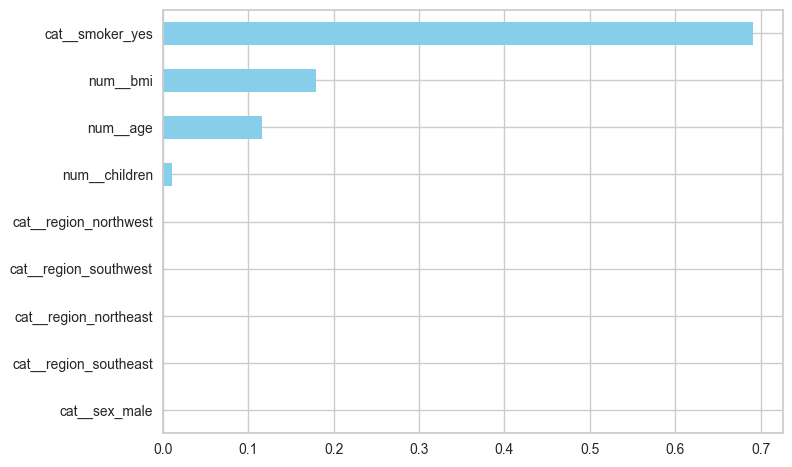

In [39]:
#Amostra visual 
importances.sort_values().plot.barh(color= 'skyblue')

# **Salvando o modelo**

In [ ]:
#Salvando o modelo final
with open('models/model.pkl', 'wb') as file_model:  #salvando arquivo em modo de escrita binário(wb)
    pickle.dump(model_pipeline, file_model)
    